In [2]:
# import libraries
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sk
from sklearn.model_selection import train_test_split
import math

from tqdm import trange
from sklearn.svm import SVC

In [3]:
# read the excel sheet 
df = pd.read_excel('./BioCode for Machine Learning Updated.xlsx')

# Read in the labels
cls = df['Classification']

# Read the DNA sequences, which are strings comprised of the letters ATCG
seq = df['Aligned Sequence']

species = df['NCBI_Genus_species']

In [13]:
print 'Unique species: '+ str(len(set(df['NCBI_Genus_species'])))

print 'Unique Aligned Sequences: ' + str(len(set(df['Aligned Sequence'])))

Unique species: 764
Unique Aligned Sequences: 2984


In [14]:
# Convert DNA data to numpy array, and convert NaNs to Nones
seq = np.array(seq.fillna('None'))

# Create a binary filter to eliminate invalid DNA sequences
valid_idx = np.array([i for i in range(len(seq)) if seq[i] != 'None'])

# Apply the filter
valid_seq = seq[valid_idx]
cls_valid = cls[valid_idx]
cls_valid = np.array(cls_valid)
species_valid = species[valid_idx]
species_valid = np.array(species_valid)

In [16]:
# Seperate string into individual characters
seq_arrays = [np.array([i for i in s]) for s in valid_seq]

mat_size = len(seq_arrays)

print(len(valid_seq), len(cls_valid), mat_size, len(species_valid))

(4459, 4459, 4459, 4459)


In [17]:
sim_mat = -np.ones((mat_size, mat_size))

# Precomputer no dashes
dashes = []
for i in range(mat_size):
    dashes.append(seq_arrays[i] != '-')

# this will take a few minutes
for i in trange(mat_size):
    # clean up bad data
    a = seq_arrays[i]
    # iterate over DNA sequences and figure out the match
    for j in range(i):
        b = seq_arrays[j]
        match = (a==b)
        valid = (dashes[i] * dashes[j])
        sim_mat[i,j] = np.mean(match[valid])
        sim_mat[j,i] = sim_mat[i,j]
    sim_mat[i,i] = 1

100%|██████████| 4459/4459 [03:17<00:00, 22.56it/s] 


In [18]:
sim_mat

array([[ 1.        ,  1.        ,  0.81430746, ...,  0.71338583,
         0.69431644,  0.69779287],
       [ 1.        ,  1.        ,  0.81430746, ...,  0.71338583,
         0.69431644,  0.69779287],
       [ 0.81430746,  0.81430746,  1.        , ...,  0.72440945,
         0.67281106,  0.67232598],
       ..., 
       [ 0.71338583,  0.71338583,  0.72440945, ...,  1.        ,
         0.75548589,  0.75      ],
       [ 0.69431644,  0.69431644,  0.67281106, ...,  0.75548589,
         1.        ,  1.        ],
       [ 0.69779287,  0.69779287,  0.67232598, ...,  0.75      ,
         1.        ,  1.        ]])

In [99]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

pca = PCA(n_components=3)
pca.fit(sim_mat)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

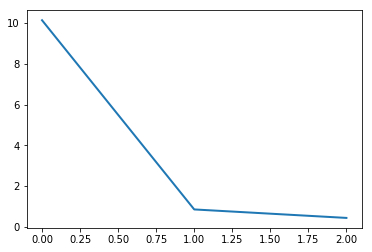

In [100]:
plt.plot(pca.explained_variance_, linewidth=2)
x_r = pca.transform(sim_mat)

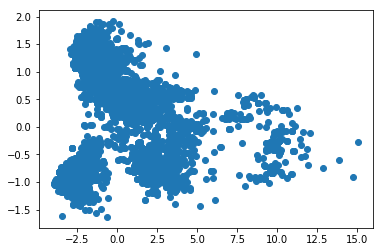

In [101]:
plt.scatter(x_r[:,0], x_r[:,1])

# 3D
if False:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
    ax = fig.gca(projection='3d')
    ax.scatter(x_r[:,0], x_r[:,1], x_r[:,2])

In [104]:
from sklearn.cluster import KMeans

clstr = KMeans(n_clusters=750)
clstr.fit(x_r[:4000])
pred = clstr.predict(x_r[4000:])

In [107]:
import pandas as pd

purities = []

for k in range(650, 750, 5):

    clstr = KMeans(n_clusters=750)
    clstr.fit(x_r[:4000])
    pred = clstr.predict(x_r[4000:])

    # Calculate purity of clusters
    clusters = set(pred)

    print species_valid[4000 + np.where(pred == 272)[0]]
    labels = species_valid[4000 + np.where(pred == 272)[0]]
    print np.unique(labels, return_counts=True)

    # Purity = \sum max # correctly classified in cluster
    tot = 0
    for cluster_num in clusters:
        labels = species_valid[4000 + np.where(pred == cluster_num)[0]]
        # Drop nans
        labels = labels[pd.isnull(labels) == False]

        # If not all are nans
        if len(labels) != 0:
            _, counts = np.unique(labels, return_counts=True)
            tot += np.max(counts)

    print tot
    # Total num objects = total objects - nans
    print len(species_valid[4000:]) - np.sum(pd.isnull(species_valid[4000:]))
    print tot / float(len(species_valid[4000:]) - np.sum(pd.isnull(species_valid[4000:])))
    
    purities.append(tot / float(len(species_valid[4000:]) - np.sum(pd.isnull(species_valid[4000:]))))

[]
(array([], dtype=object), array([], dtype=int64))
223
269
0.828996282528
[]
(array([], dtype=object), array([], dtype=int64))
235
269
0.873605947955
[]
(array([], dtype=object), array([], dtype=int64))
220
269
0.817843866171
[]
(array([], dtype=object), array([], dtype=int64))
227
269
0.843866171004
[]
(array([], dtype=object), array([], dtype=int64))
224
269
0.832713754647
[]
(array([], dtype=object), array([], dtype=int64))
220
269
0.817843866171
[]
(array([], dtype=object), array([], dtype=int64))
230
269
0.855018587361
[]
(array([], dtype=object), array([], dtype=int64))
225
269
0.836431226766
[]
(array([], dtype=object), array([], dtype=int64))
234
269
0.869888475836
[]
(array([], dtype=object), array([], dtype=int64))
227
269
0.843866171004
[]
(array([], dtype=object), array([], dtype=int64))
228
269
0.847583643123
[]
(array([], dtype=object), array([], dtype=int64))
224
269
0.832713754647
[]
(array([], dtype=object), array([], dtype=int64))
223
269
0.828996282528
[]
(array([]

In [130]:
# apply the filter over our features and labels
# supervised_X = approx[labeled_cls]
# full_supervised_X = valid_mat[labeled_cls]
supervised_y = cls_valid[labeled_cls]
supervised_y = (supervised_y == 'Indigenous').astype(int)

In [131]:
unique = set()
species_filter = []
for i in species_valid:
    if i not in unique:
        species_filter.append(True)
        unique.add(i)
    else:
        species_filter.append(False)

In [132]:
# supervised_X = supervised_X[species_filter]
# full_supervised_X = full_supervised_X[species_filter]
supervised_y = supervised_y[species_filter]
feats = feats[species_filter]

In [133]:
print(feats.shape)
test_train_ratio = 0.5
feats_train, feats_test, y_train, y_test = train_test_split(feats, supervised_y, test_size=test_train_ratio)

(231, 4)


In [134]:
print(feats_train.shape, feats_test.shape)

(115, 4) (116, 4)


In [136]:
print(np.mean(y_test))

0.189655172414


In [119]:
for i in range(len(feats)):
    print(feats[i])

[0.190333333 0.029 0.0953 97.27333333]
[0.149986667 0.002066667 0.0654 99.81609524]
[0.149986667 0.002066667 0.0654 99.81609524]
[0.149986667 0.002066667 0.0654 99.81609524]
[0.149986667 0.002066667 0.0654 99.81609524]
[0.203375 0.007833333 0.0974 99.502]
[0.203375 0.007833333 0.0974 99.502]
[0.24075 0.0 0.1393 99.79]
[0.106125 0.003 0.0492 99.7975]
[0.191454545 0.005581818 0.0823 99.70818182]
[0.191454545 0.005581818 0.0823 99.70818182]
[0.192 0.016 0.0904 98.46]
[0.1525 0.002607143 0.0729 99.96678571]
[0.178666667 0.002 0.0885 99.85]
[0.178666667 0.014666667 0.0724 98.58]
[0.189375 0.006694444 0.0972 99.96027778]
[0.18784375 0.021642857 0.0674 99.16142857]
[0.18784375 0.021642857 0.0674 99.16142857]
[0.18784375 0.021642857 0.0674 99.16142857]
[0.18784375 0.021642857 0.0674 99.16142857]
[0.18784375 0.001 0.0948 99.925]
[0.2128 0.0304 0.0863 96.928]
[0.11325 0.019 0.0682 98.36]
[0.214333333 0.002 0.1118 99.84666667]
[0.21 0.008 0.1003 99.24]
[0.2262 0.015 0.1039 99.634]
[0.196 0.004666

In [138]:
clf = sk.linear_model.LogisticRegression() # class_weight = {0:0.15, 1:0.85})
clf.fit(feats_train, y_train)
prediction = (clf.predict(feats_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(y_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.810344827586
Weights: [[-0.55984671  0.09872703 -0.33896843 -0.01750261]]
